
--- Processing model: RNN ---
[0.9033571481704712, 0.9042857110500335, 0.9044285694758097, 0.9029464274644852, 0.900685715675354, 0.8956785698731741, 0.8851326516696385, 0.8670267850160599, 0.8476507941881816, 0.828407143354416, 0.810435065356168]

--- Processing model: CNN ---
[0.9019285798072815, 0.9011785745620727, 0.8993571440378826, 0.8974821448326111, 0.8961714291572571, 0.8947023828824361, 0.888724490574428, 0.8727678582072258, 0.8536428570747376, 0.8351785707473756, 0.8179545445875689]

--- Processing model: LSTM ---
[0.9134285807609558, 0.9130357146263122, 0.9119761904080708, 0.9111071437597273, 0.9106142878532408, 0.9096309542655944, 0.9046938793999807, 0.8941339299082756, 0.8802936527464125, 0.8659285724163055, 0.8521233786236156]

--- Processing model: NCP ---
[0.9007857203483581, 0.900428581237793, 0.8990238149960836, 0.89580357670784, 0.8852571463584902, 0.8648095269997915, 0.8415102056094579, 0.8195178598165512, 0.7994682563675775, 0.7806000018119812, 0.7630649371580644

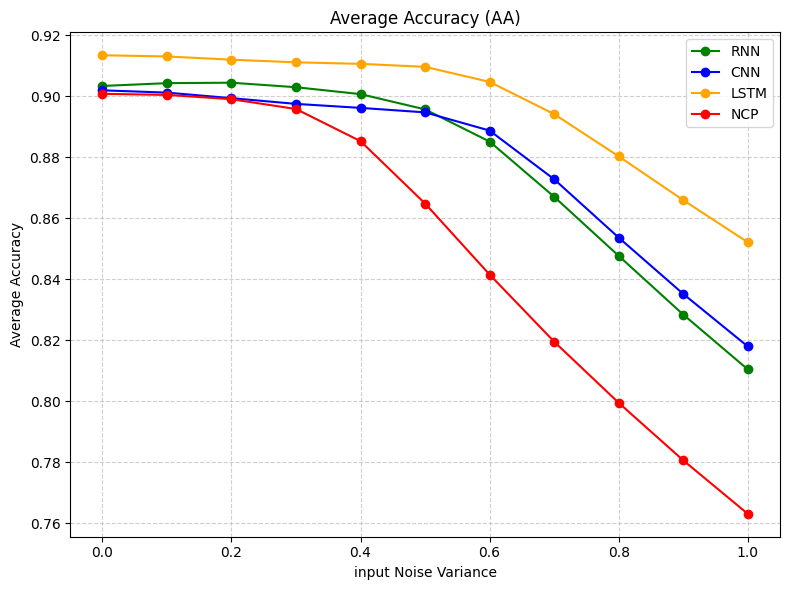

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === 設定 ===
seeds = [1, 2, 3, 4, 5]
models_to_process = ["RNN", "CNN", "LSTM", "NCP"]

csv_baseline_base = "/work/csv/uci-har/dil-noise/none"

color_palette = {
    "CNN": "blue",
    "RNN": "green",
    "LSTM": "orange",
    "NCP": "red"
}

# === プロット用データ格納 ===
plt.figure(figsize=(8, 6))

for model_name in models_to_process:
    print(f"\n--- Processing model: {model_name} ---")
    all_dfs = []

    for seed in seeds:
        file_path = os.path.join(csv_baseline_base, model_name.lower(), f"seed{seed}_baseline.csv")

        if not os.path.exists(file_path):
            print(f"⚠️ ファイルが見つかりません: {file_path}")
            continue

        df = pd.read_csv(file_path)

        # noise_level と Test Acc を抽出
        df = df[['noise_level', 'テスト精度 (Test Acc)']]

        all_dfs.append(df)

    if not all_dfs:
        continue

    # --- seedごとの平均 ---
    merged_df = pd.concat(all_dfs)
    grouped = merged_df.groupby("noise_level").mean().reset_index()

    noise_levels = grouped["noise_level"].tolist()
    accs = grouped["テスト精度 (Test Acc)"].tolist()
    aa_accs=[]
    sum=0
    for i in range(len(accs)):
        sum += accs[i]
        aa_accs.append(sum/(i+1))
    print(aa_accs)

    plt.plot(noise_levels, aa_accs, label=model_name, color=color_palette[model_name], marker="o")

# === グラフの装飾 ===
plt.xlabel("input Noise Variance")
plt.ylabel("Average Accuracy")
plt.title("Average Accuracy (AA)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
